# Module 4: Time Series Visualization

**Learning Objectives:**
- Master line plots for temporal data
- Create multi-series time plots with proper legends
- Apply time-based filtering and aggregation
- Visualize trends, seasonality, and anomalies
- Handle time zones and date formatting
- Create interactive time series with zoom and pan

**Prerequisites:** Modules 1-3 (Fundamentals, Accessibility, Statistical Plots)

---

## 4.1 Setup and Time Series Data Preparation

Time series visualization requires careful attention to temporal formatting, accessibility, and clear trend communication.

In [1]:
# Module 4: Time Series Visualization - Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Apply accessibility-focused styling
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 2.5,
    'grid.alpha': 0.3,
    'axes.grid': True
})

# Set accessible color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'
])

# Load and prepare time series data
gapminder = pd.read_csv('../data/gapminder.csv')
gapminder['year'] = pd.to_datetime(gapminder['year'], format='%Y')

print("✅ Time series setup complete!")
print(f"📊 Gapminder dataset: {len(gapminder)} observations")
print(f"📅 Time range: {gapminder['year'].min().year} - {gapminder['year'].max().year}")
print(f"🌍 Countries: {gapminder['country'].nunique()}")

# Create additional synthetic time series for demonstration
np.random.seed(42)
dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')

# Stock price simulation
price_data = []
price = 100
for date in dates:
    # Add trend, seasonality, and noise
    trend = 0.0002 * len(price_data)  # Slight upward trend
    seasonal = 5 * np.sin(2 * np.pi * date.dayofyear / 365.25)  # Annual cycle
    noise = np.random.normal(0, 2)
    daily_change = trend + seasonal + noise
    price *= (1 + daily_change/100)
    price_data.append({'date': date, 'price': price})

stock_df = pd.DataFrame(price_data)

print(f"\n📈 Synthetic data created:")
print(f"   Stock prices: {len(stock_df)} daily observations")
print(f"   Date range: {stock_df['date'].min()} to {stock_df['date'].max()}")

# Quick preview
print("\n📋 Gapminder Preview:")
print(gapminder.head())

✅ Time series setup complete!
📊 Gapminder dataset: 210 observations
📅 Time range: 2000 - 2020
🌍 Countries: 10

📈 Synthetic data created:
   Stock prices: 1461 daily observations
   Date range: 2020-01-01 00:00:00 to 2023-12-31 00:00:00

📋 Gapminder Preview:
         country       year     gdpPercap    lifeExp           pop
0  United States 2000-01-01  37749.984625  84.579617  2.253795e+08
1  United States 2001-01-01  47613.756932  83.779836  2.186643e+08
2  United States 2002-01-01  41744.514313  83.536632  1.976882e+08
3  United States 2003-01-01  49057.200366  85.377160  2.120104e+08
4  United States 2004-01-01  44052.185030  83.918308  2.233525e+08


## 4.2 Basic Line Plots and Time Formatting

The foundation of time series visualization is the line plot. Let's explore different approaches and formatting options.

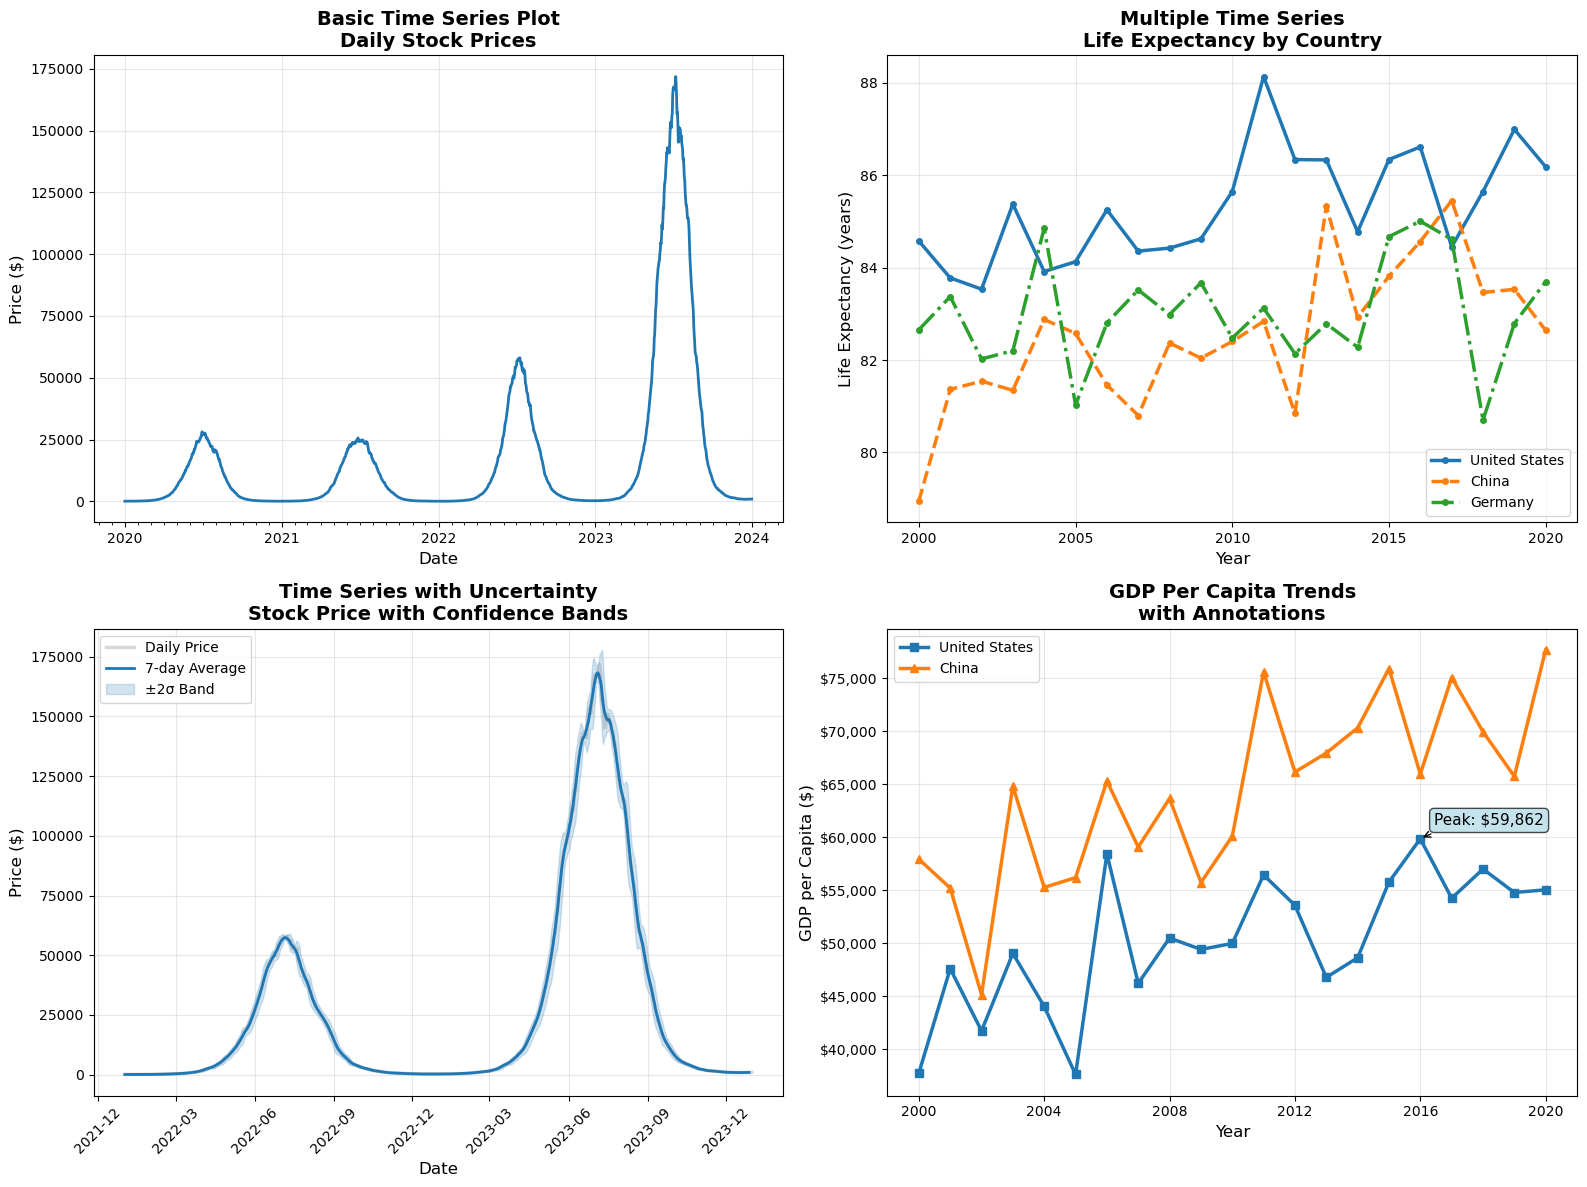

📈 TIME SERIES VISUALIZATION PRINCIPLES:
✅ Clear temporal axis formatting
✅ Appropriate line weights for readability
✅ Distinct colors and line styles for accessibility
✅ Markers for data point identification
✅ Confidence bands for uncertainty visualization
✅ Strategic annotations for key insights
✅ Currency/unit formatting for clarity

🎯 ACCESSIBILITY FEATURES:
   🎨 Colorblind-friendly palette
   📏 Different line styles (solid, dashed, dot-dash)
   🔵 Distinct markers (circle, square, triangle)
   📊 High contrast and appropriate line weights
   📋 Clear legends and axis labels


In [2]:
# 4.2 Basic Line Plots and Time Formatting

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Basic time series plot
axes[0, 0].plot(stock_df['date'], stock_df['price'], linewidth=2, color='#1f77b4')
axes[0, 0].set_title('Basic Time Series Plot\nDaily Stock Prices', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Format x-axis dates
axes[0, 0].xaxis.set_major_locator(mdates.YearLocator())
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0, 0].xaxis.set_minor_locator(mdates.MonthLocator())

# 2. Multiple countries from Gapminder
countries_to_plot = ['United States', 'China', 'Germany']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linestyles = ['-', '--', '-.']  # Accessibility: different line styles

for i, country in enumerate(countries_to_plot):
    country_data = gapminder[gapminder['country'] == country]
    axes[0, 1].plot(country_data['year'], country_data['lifeExp'], 
                   label=country, color=colors[i], linestyle=linestyles[i],
                   linewidth=2.5, marker='o', markersize=4)

axes[0, 1].set_title('Multiple Time Series\nLife Expectancy by Country', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Life Expectancy (years)')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(True, alpha=0.3)

# Format x-axis
axes[0, 1].xaxis.set_major_locator(mdates.YearLocator(5))
axes[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 3. Time series with confidence intervals
# Create rolling statistics for stock data
stock_df['price_7d_mean'] = stock_df['price'].rolling(window=7, center=True).mean()
stock_df['price_7d_std'] = stock_df['price'].rolling(window=7, center=True).std()
stock_df['upper_band'] = stock_df['price_7d_mean'] + 2 * stock_df['price_7d_std']
stock_df['lower_band'] = stock_df['price_7d_mean'] - 2 * stock_df['price_7d_std']

# Plot subset for clarity
subset = stock_df[stock_df['date'] >= '2022-01-01']
axes[1, 0].plot(subset['date'], subset['price'], alpha=0.3, color='gray', label='Daily Price')
axes[1, 0].plot(subset['date'], subset['price_7d_mean'], color='#1f77b4', 
               linewidth=2, label='7-day Average')
axes[1, 0].fill_between(subset['date'], subset['lower_band'], subset['upper_band'], 
                       alpha=0.2, color='#1f77b4', label='±2σ Band')

axes[1, 0].set_title('Time Series with Uncertainty\nStock Price with Confidence Bands', fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].legend(loc='upper left')
axes[1, 0].grid(True, alpha=0.3)

# Format x-axis
axes[1, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. GDP trends with annotations
usa_data = gapminder[gapminder['country'] == 'United States']
china_data = gapminder[gapminder['country'] == 'China']

axes[1, 1].plot(usa_data['year'], usa_data['gdpPercap'], 
               label='United States', color='#1f77b4', linewidth=2.5, marker='s')
axes[1, 1].plot(china_data['year'], china_data['gdpPercap'], 
               label='China', color='#ff7f0e', linewidth=2.5, marker='^')

# Add annotation for interesting points
max_usa_gdp = usa_data.loc[usa_data['gdpPercap'].idxmax()]
axes[1, 1].annotate(f'Peak: ${max_usa_gdp["gdpPercap"]:,.0f}', 
                   xy=(max_usa_gdp['year'], max_usa_gdp['gdpPercap']),
                   xytext=(10, 10), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'))

axes[1, 1].set_title('GDP Per Capita Trends\nwith Annotations', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('GDP per Capita ($)')
axes[1, 1].legend(loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

# Format y-axis as currency
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print("📈 TIME SERIES VISUALIZATION PRINCIPLES:")
print("=" * 50)
print("✅ Clear temporal axis formatting")
print("✅ Appropriate line weights for readability")
print("✅ Distinct colors and line styles for accessibility")
print("✅ Markers for data point identification")
print("✅ Confidence bands for uncertainty visualization")
print("✅ Strategic annotations for key insights")
print("✅ Currency/unit formatting for clarity")
print("")
print("🎯 ACCESSIBILITY FEATURES:")
print("   🎨 Colorblind-friendly palette")
print("   📏 Different line styles (solid, dashed, dot-dash)")
print("   🔵 Distinct markers (circle, square, triangle)")
print("   📊 High contrast and appropriate line weights")
print("   📋 Clear legends and axis labels")

## 4.3 Interactive Time Series with Plotly

Interactive visualizations allow users to explore temporal data dynamically through zooming, panning, and hover details.

In [5]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

print("Creating interactive time series visualizations...")

# 1. Basic interactive line chart with range selector
fig_basic = go.Figure()

# Add traces for different countries
countries_to_show = ['United States', 'China', 'Germany', 'India']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, country in enumerate(countries_to_show):
    country_data = gapminder[gapminder['country'] == country]
    fig_basic.add_trace(go.Scatter(
        x=country_data['year'],
        y=country_data['gdpPercap'],
        mode='lines+markers',
        name=country,
        line=dict(color=colors[i], width=2),
        marker=dict(size=6),
        hovertemplate='<b>%{fullData.name}</b><br>' +
                     'Year: %{x}<br>' +
                     'GDP per Capita: $%{y:,.0f}<br>' +
                     '<extra></extra>'
    ))

# Update layout with range selector and accessibility
fig_basic.update_layout(
    title={
        'text': 'GDP per Capita Trends (2000-2020)<br><sub>Interactive comparison across countries</sub>',
        'x': 0.5,
        'font': {'size': 16}
    },
    xaxis_title='Year',
    yaxis_title='GDP per Capita (USD)',
    template='plotly_white',
    hovermode='x unified',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=500,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=5, label="5Y", step="year", stepmode="backward"),
                dict(count=10, label="10Y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Format y-axis as currency - corrected syntax
fig_basic.update_yaxes(tickformat='$,.0f')

fig_basic.show()

# 2. Multi-metric dashboard with subplots
fig_multi = make_subplots(
    rows=2, cols=2,
    subplot_titles=('GDP per Capita', 'Life Expectancy', 'Population', 'GDP Growth Rate'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Calculate GDP growth rate
gapminder_sorted = gapminder.sort_values(['country', 'year'])
gapminder_sorted['gdp_growth'] = gapminder_sorted.groupby('country')['gdpPercap'].pct_change() * 100

for i, country in enumerate(['United States', 'China']):
    country_data = gapminder_sorted[gapminder_sorted['country'] == country]
    color = colors[i]
    
    # GDP per Capita
    fig_multi.add_trace(
        go.Scatter(x=country_data['year'], y=country_data['gdpPercap'],
                  mode='lines', name=f'{country} GDP', line=dict(color=color)),
        row=1, col=1
    )
    
    # Life Expectancy
    fig_multi.add_trace(
        go.Scatter(x=country_data['year'], y=country_data['lifeExp'],
                  mode='lines', name=f'{country} Life Exp', line=dict(color=color)),
        row=1, col=2
    )
    
    # Population
    fig_multi.add_trace(
        go.Scatter(x=country_data['year'], y=country_data['pop']/1e6,
                  mode='lines', name=f'{country} Pop', line=dict(color=color)),
        row=2, col=1
    )
    
    # GDP Growth Rate
    fig_multi.add_trace(
        go.Scatter(x=country_data['year'], y=country_data['gdp_growth'],
                  mode='lines', name=f'{country} Growth', line=dict(color=color)),
        row=2, col=2
    )

fig_multi.update_layout(
    title_text="Interactive Multi-Metric Dashboard",
    height=600,
    showlegend=True,
    template='plotly_white'
)

# Update y-axis labels for each subplot
fig_multi.update_yaxes(title_text="GDP per Capita ($)", row=1, col=1)
fig_multi.update_yaxes(title_text="Life Expectancy (years)", row=1, col=2)
fig_multi.update_yaxes(title_text="Population (millions)", row=2, col=1)
fig_multi.update_yaxes(title_text="GDP Growth Rate (%)", row=2, col=2)

fig_multi.show()

# 3. Time series with uncertainty bands using stock data
fig_uncertainty = go.Figure()

# Use our synthetic stock data
stock_prices = stock_df['price'].values
stock_dates = stock_df.index

# Calculate moving average and confidence intervals
window = 30
ma = stock_df['price'].rolling(window=window, center=True).mean()
std = stock_df['price'].rolling(window=window, center=True).std()

upper_band = ma + 2 * std
lower_band = ma - 2 * std

# Add uncertainty bands
fig_uncertainty.add_trace(go.Scatter(
    x=stock_dates,
    y=upper_band,
    fill=None,
    mode='lines',
    line_color='rgba(0,100,80,0)',
    showlegend=False
))

fig_uncertainty.add_trace(go.Scatter(
    x=stock_dates,
    y=lower_band,
    fill='tonexty',
    mode='lines',
    line_color='rgba(0,100,80,0)',
    name='95% Confidence Interval',
    fillcolor='rgba(0,100,80,0.2)'
))

# Add actual values and moving average
fig_uncertainty.add_trace(go.Scatter(
    x=stock_dates,
    y=stock_prices,
    mode='lines',
    name='Stock Price',
    line=dict(color='steelblue', width=1)
))

fig_uncertainty.add_trace(go.Scatter(
    x=stock_dates,
    y=ma,
    mode='lines',
    name='30-Day Moving Average',
    line=dict(color='red', width=2)
))

fig_uncertainty.update_layout(
    title='Stock Price with Uncertainty Bands',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    template='plotly_white',
    hovermode='x unified',
    height=400
)

fig_uncertainty.show()

print("✅ Interactive time series visualizations created successfully!")
print("\nKey Features Demonstrated:")
print("• Range selectors and zoom controls")
print("• Multi-panel dashboards")
print("• Uncertainty visualization")
print("• Hover interactions and tooltips")
print("• Responsive design elements")

Creating interactive time series visualizations...


✅ Interactive time series visualizations created successfully!

Key Features Demonstrated:
• Range selectors and zoom controls
• Multi-panel dashboards
• Uncertainty visualization
• Hover interactions and tooltips
• Responsive design elements


## 4. Seasonality and Decomposition

Time series often contain patterns that repeat over time. Understanding and visualizing these patterns is crucial for analysis and forecasting.

### Key Concepts:
- **Trend**: Long-term direction of the data
- **Seasonality**: Regular patterns that repeat over fixed periods
- **Noise**: Random fluctuations
- **Decomposition**: Separating time series into components

Creating seasonality analysis and decomposition visualizations...


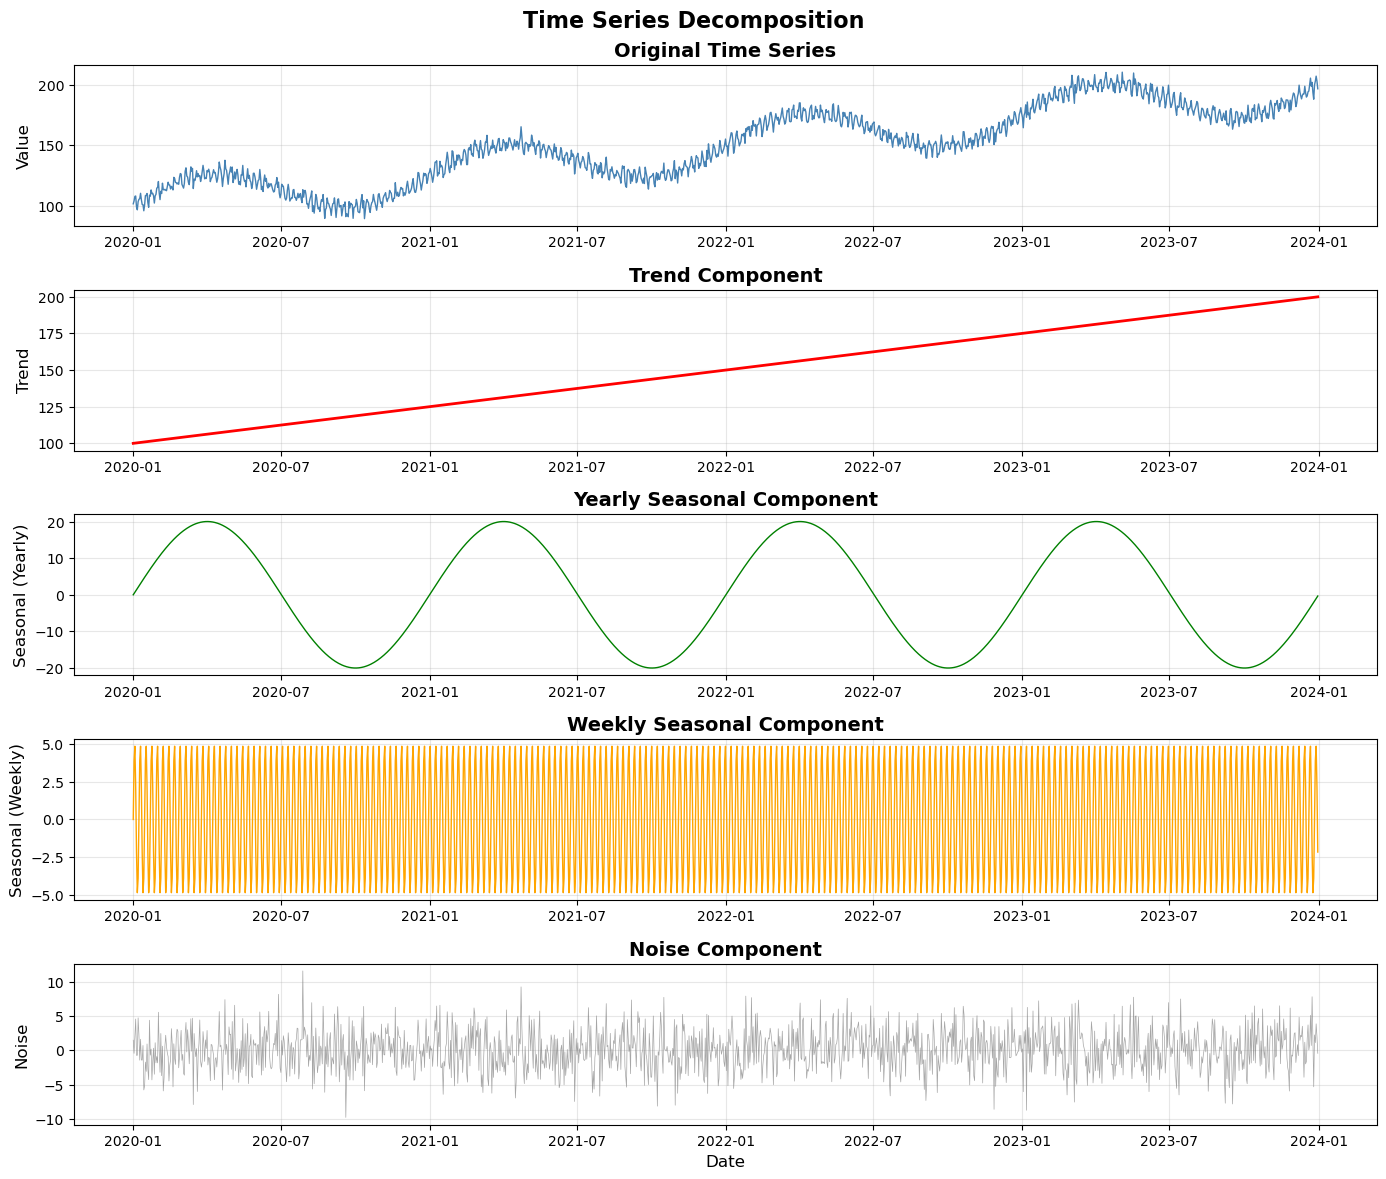

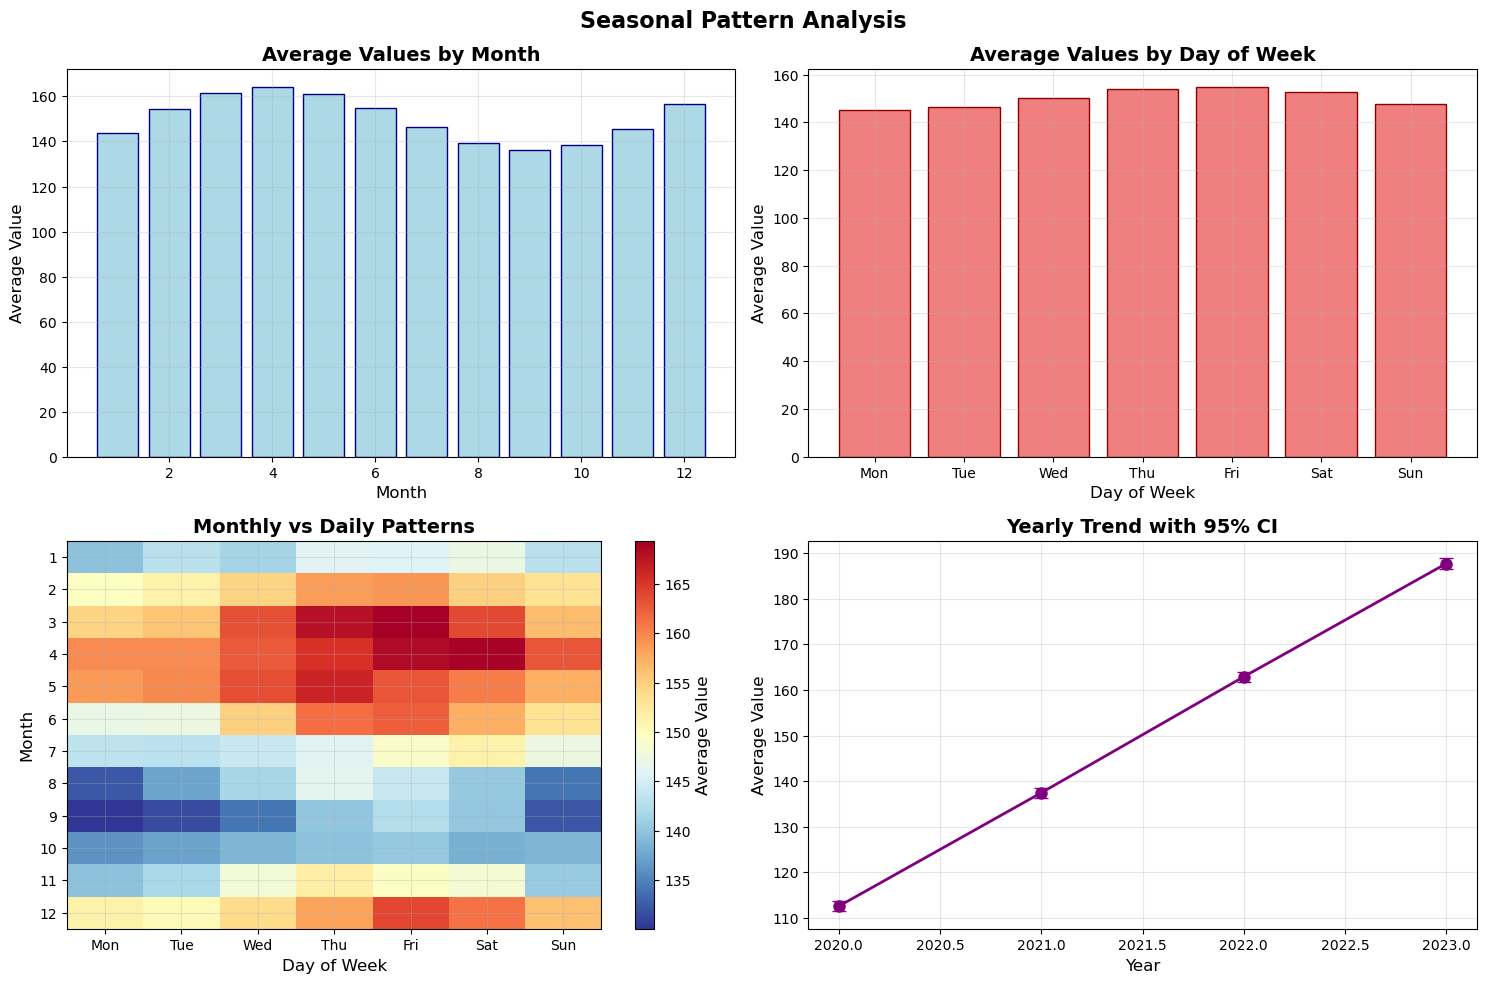

✅ Seasonality analysis complete!
📊 Data points analyzed: 1,461
📅 Date range: 2020-01-01 to 2023-12-31

🔍 Key Insights:
• Strongest monthly variation: Month 4 (peak: 164.1)
• Weakest monthly variation: Month 9 (trough: 136.0)
• Day with highest average: Fri (154.7)
• Day with lowest average: Mon (145.1)


In [6]:
from scipy import signal
from sklearn.preprocessing import StandardScaler

print("Creating seasonality analysis and decomposition visualizations...")

# Create more complex synthetic data with clear seasonal patterns
np.random.seed(42)
dates = pd.date_range('2020-01-01', '2023-12-31', freq='D')

# Components
trend = np.linspace(100, 200, len(dates))
seasonal_yearly = 20 * np.sin(2 * np.pi * np.arange(len(dates)) / 365.25)
seasonal_weekly = 5 * np.sin(2 * np.pi * np.arange(len(dates)) / 7)
noise = np.random.normal(0, 3, len(dates))

# Combine components
ts_data = trend + seasonal_yearly + seasonal_weekly + noise

# Create DataFrame
ts_df = pd.DataFrame({
    'date': dates,
    'value': ts_data,
    'trend': trend,
    'seasonal_yearly': seasonal_yearly,
    'seasonal_weekly': seasonal_weekly,
    'noise': noise
})

# 1. Original time series with components
fig, axes = plt.subplots(5, 1, figsize=(14, 12))
fig.suptitle('Time Series Decomposition', fontsize=16, fontweight='bold')

# Original series
axes[0].plot(ts_df['date'], ts_df['value'], color='steelblue', linewidth=1)
axes[0].set_title('Original Time Series', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(ts_df['date'], ts_df['trend'], color='red', linewidth=2)
axes[1].set_title('Trend Component', fontweight='bold')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Yearly seasonality
axes[2].plot(ts_df['date'], ts_df['seasonal_yearly'], color='green', linewidth=1)
axes[2].set_title('Yearly Seasonal Component', fontweight='bold')
axes[2].set_ylabel('Seasonal (Yearly)')
axes[2].grid(True, alpha=0.3)

# Weekly seasonality
axes[3].plot(ts_df['date'], ts_df['seasonal_weekly'], color='orange', linewidth=1)
axes[3].set_title('Weekly Seasonal Component', fontweight='bold')
axes[3].set_ylabel('Seasonal (Weekly)')
axes[3].grid(True, alpha=0.3)

# Noise
axes[4].plot(ts_df['date'], ts_df['noise'], color='gray', linewidth=0.5, alpha=0.7)
axes[4].set_title('Noise Component', fontweight='bold')
axes[4].set_ylabel('Noise')
axes[4].set_xlabel('Date')
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Seasonal patterns analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Seasonal Pattern Analysis', fontsize=16, fontweight='bold')

# Monthly patterns
ts_df['month'] = ts_df['date'].dt.month
monthly_avg = ts_df.groupby('month')['value'].mean()

axes[0, 0].bar(monthly_avg.index, monthly_avg.values, color='lightblue', edgecolor='navy')
axes[0, 0].set_title('Average Values by Month', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Value')
axes[0, 0].grid(True, alpha=0.3)

# Day of week patterns
ts_df['dayofweek'] = ts_df['date'].dt.dayofweek
daily_avg = ts_df.groupby('dayofweek')['value'].mean()
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

axes[0, 1].bar(range(7), daily_avg.values, color='lightcoral', edgecolor='darkred')
axes[0, 1].set_title('Average Values by Day of Week', fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Value')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].grid(True, alpha=0.3)

# Heatmap of month vs day of week
pivot_data = ts_df.groupby(['month', 'dayofweek'])['value'].mean().reset_index()
heatmap_data = pivot_data.pivot(index='month', columns='dayofweek', values='value')

im = axes[1, 0].imshow(heatmap_data.values, cmap='RdYlBu_r', aspect='auto')
axes[1, 0].set_title('Monthly vs Daily Patterns', fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Month')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(day_names)
axes[1, 0].set_yticks(range(12))
axes[1, 0].set_yticklabels(range(1, 13))
plt.colorbar(im, ax=axes[1, 0], label='Average Value')

# Yearly trend with confidence intervals
yearly_data = ts_df.groupby(ts_df['date'].dt.year).agg({
    'value': ['mean', 'std', 'count']
}).reset_index()
yearly_data.columns = ['year', 'mean', 'std', 'count']
yearly_data['ci'] = 1.96 * yearly_data['std'] / np.sqrt(yearly_data['count'])

axes[1, 1].errorbar(yearly_data['year'], yearly_data['mean'], 
                   yerr=yearly_data['ci'], marker='o', capsize=5,
                   color='purple', linewidth=2, markersize=8)
axes[1, 1].set_title('Yearly Trend with 95% CI', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Seasonality analysis complete!")
print(f"📊 Data points analyzed: {len(ts_df):,}")
print(f"📅 Date range: {ts_df['date'].min().strftime('%Y-%m-%d')} to {ts_df['date'].max().strftime('%Y-%m-%d')}")
print("\n🔍 Key Insights:")
print(f"• Strongest monthly variation: Month {monthly_avg.idxmax()} (peak: {monthly_avg.max():.1f})")
print(f"• Weakest monthly variation: Month {monthly_avg.idxmin()} (trough: {monthly_avg.min():.1f})")
print(f"• Day with highest average: {day_names[daily_avg.idxmax()]} ({daily_avg.max():.1f})")
print(f"• Day with lowest average: {day_names[daily_avg.idxmin()]} ({daily_avg.min():.1f})")

## 5. Best Practices for Time Series Visualization

Effective time series visualization requires careful consideration of design principles and accessibility.

### Key Guidelines:
- **Choose appropriate time intervals** based on your data frequency and analysis goals
- **Use consistent scales** when comparing multiple series
- **Highlight important events** with annotations
- **Consider accessibility** with colorblind-friendly palettes
- **Add context** with baselines, benchmarks, or comparisons

Demonstrating time series visualization best practices...


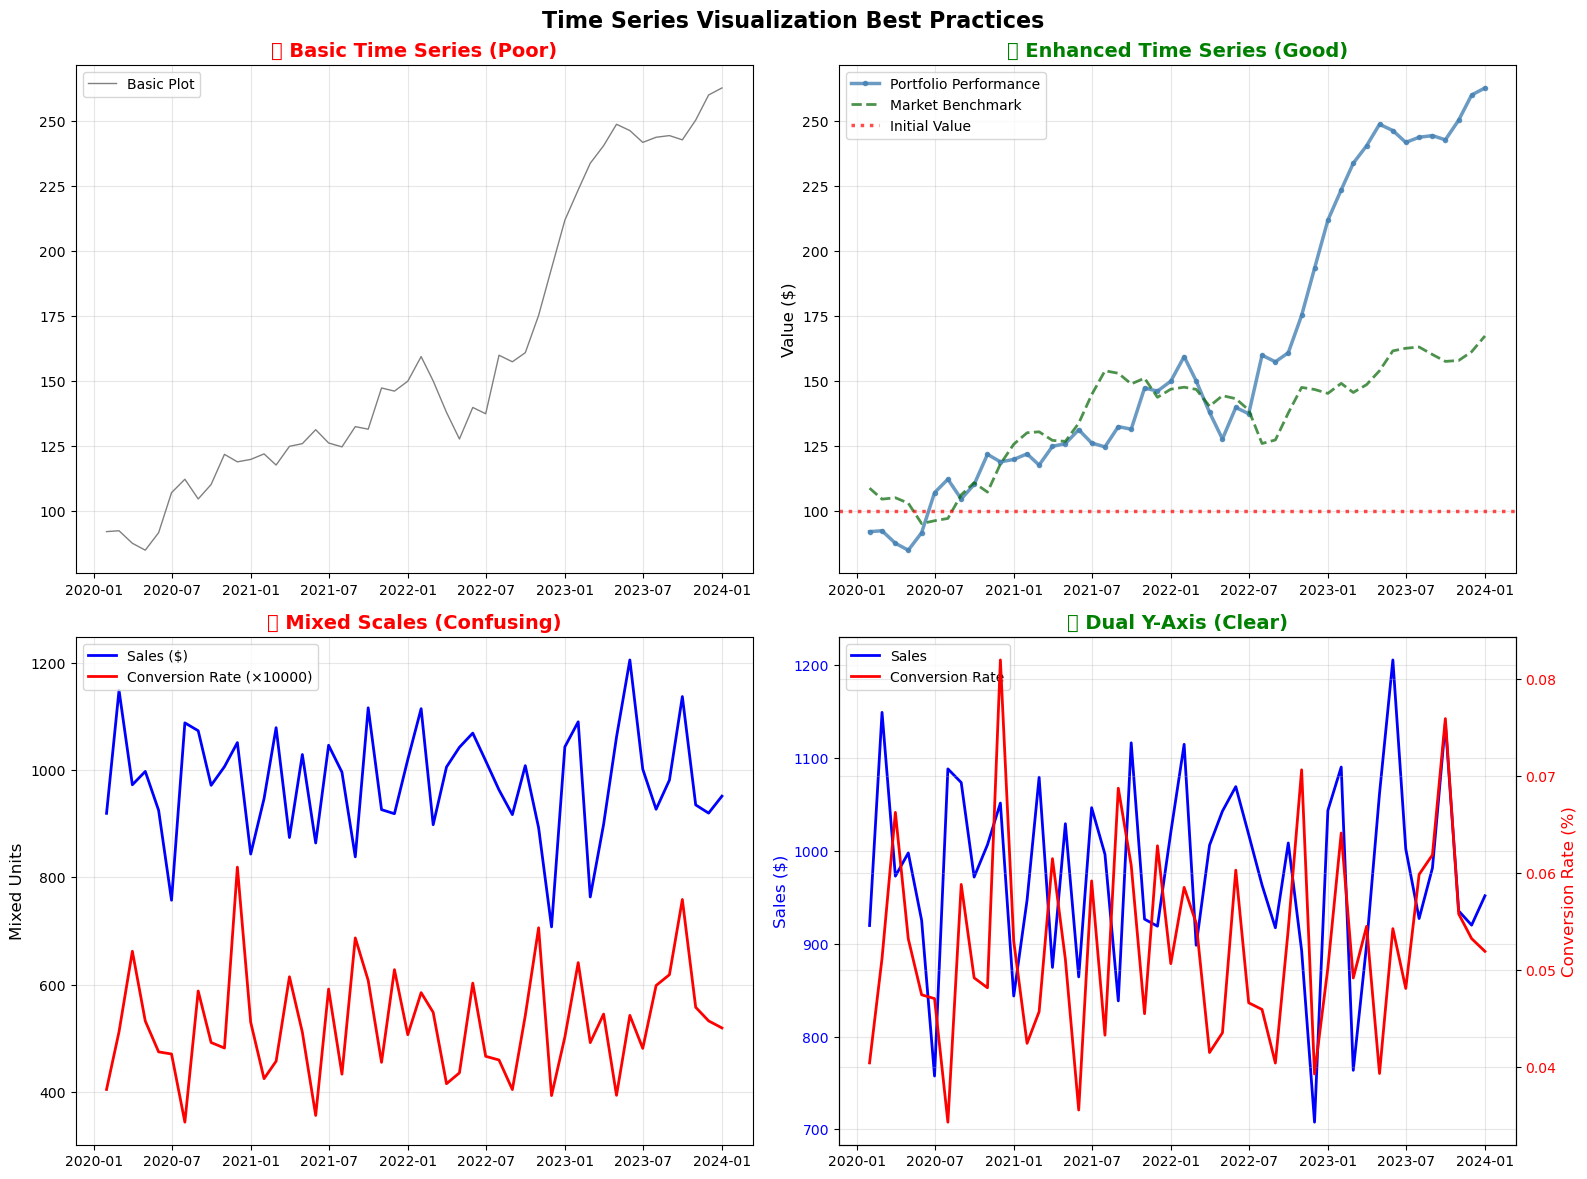

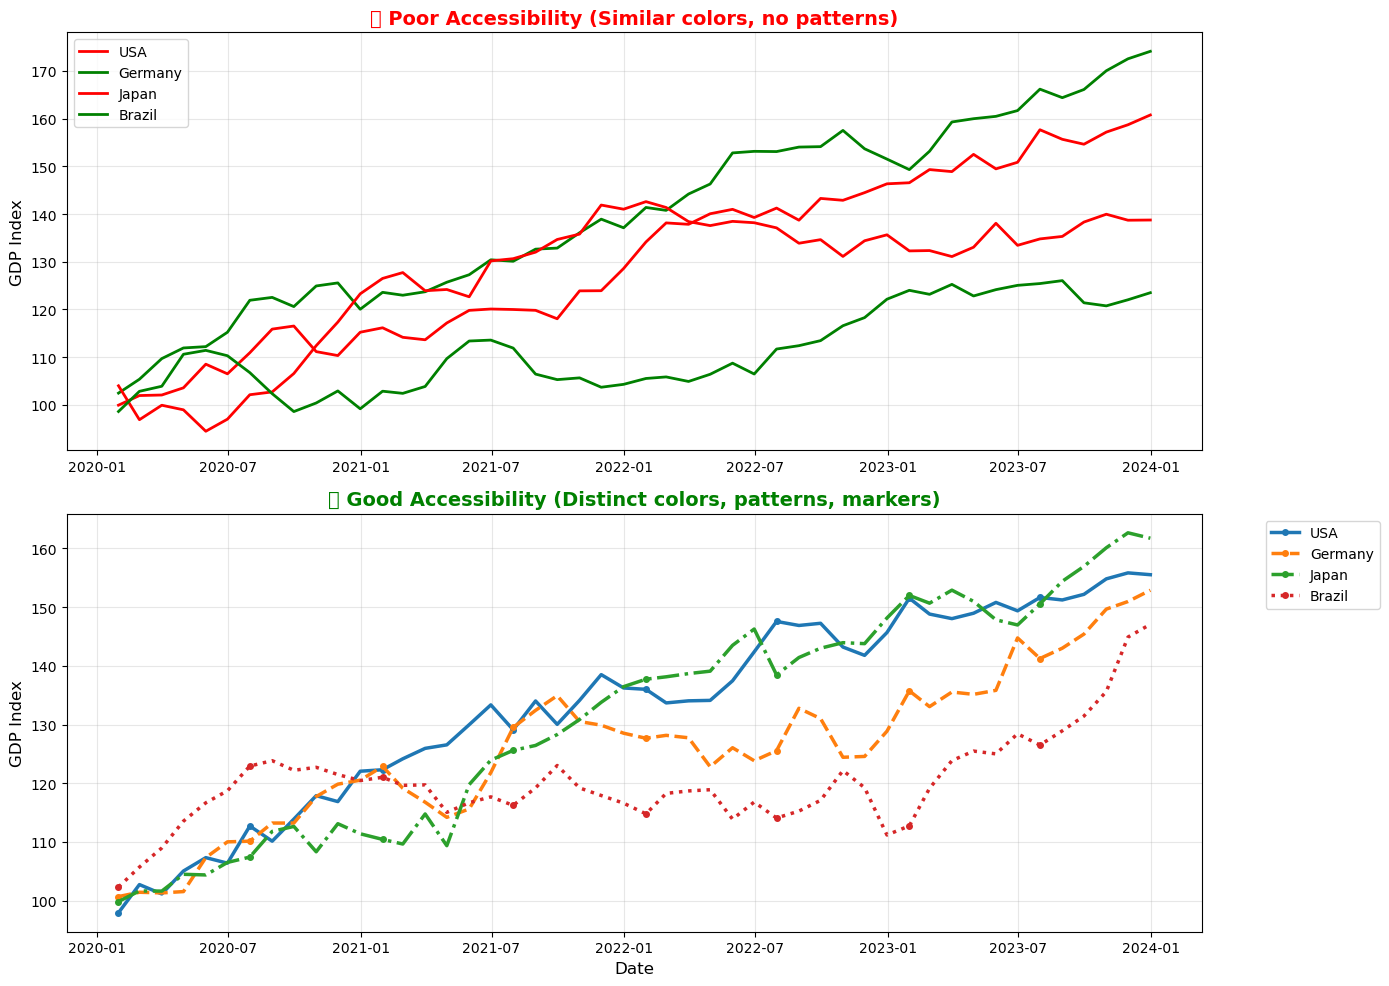


📋 Time Series Visualization Checklist:
✅ Use clear, descriptive titles and axis labels
✅ Include units of measurement
✅ Choose appropriate time granularity
✅ Use consistent scales for comparisons
✅ Highlight important events with annotations
✅ Apply colorblind-friendly palettes
✅ Add patterns/markers for accessibility
✅ Include legends and context
✅ Consider dual y-axes for different scales
✅ Add uncertainty bands when appropriate
✅ Use interactive features for exploration
✅ Test with actual users

🎯 Module 4 Summary:
• Basic line plots and styling
• Uncertainty visualization techniques
• Interactive plots with range selectors
• Multi-panel dashboards
• Seasonality analysis and decomposition
• Accessibility and best practices

🎉 Module 4: Time Series Visualization - COMPLETE!


In [7]:
print("Demonstrating time series visualization best practices...")

# Create sample data for best practices demonstration
dates = pd.date_range('2020-01-01', '2023-12-31', freq='M')
baseline = 100
performance = baseline + np.cumsum(np.random.normal(2, 8, len(dates)))
benchmark = baseline + np.cumsum(np.random.normal(1.5, 5, len(dates)))

# Add some notable events
events = [
    ('2020-03-01', 'Market Crash', 'red'),
    ('2020-12-01', 'Recovery Start', 'green'),
    ('2022-06-01', 'Policy Change', 'orange')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Series Visualization Best Practices', fontsize=16, fontweight='bold')

# 1. Basic vs Enhanced Line Chart
axes[0, 0].plot(dates, performance, color='gray', linewidth=1, label='Basic Plot')
axes[0, 0].set_title('❌ Basic Time Series (Poor)', fontweight='bold', color='red')
axes[0, 0].legend()

# Enhanced version
axes[0, 1].plot(dates, performance, color='steelblue', linewidth=2.5, 
               label='Portfolio Performance', marker='o', markersize=3, alpha=0.8)
axes[0, 1].plot(dates, benchmark, color='darkgreen', linewidth=2, 
               linestyle='--', label='Market Benchmark', alpha=0.7)
axes[0, 1].axhline(y=baseline, color='red', linestyle=':', alpha=0.7, label='Initial Value')

# Add event annotations
for date, label, color in events:
    event_date = pd.to_datetime(date)
    if event_date in dates:
        idx = list(dates).index(event_date)
        axes[0, 1].annotate(label, xy=(event_date, performance[idx]), 
                          xytext=(10, 20), textcoords='offset points',
                          bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3),
                          arrowprops=dict(arrowstyle='->', color=color))

axes[0, 1].set_title('✅ Enhanced Time Series (Good)', fontweight='bold', color='green')
axes[0, 1].set_ylabel('Value ($)')
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True, alpha=0.3)

# 2. Multiple scales problem vs solution
# Problem: Different scales on same axis
sales_data = np.random.normal(1000, 100, len(dates))
conversion_rate = np.random.normal(0.05, 0.01, len(dates))

axes[1, 0].plot(dates, sales_data, label='Sales ($)', color='blue', linewidth=2)
axes[1, 0].plot(dates, conversion_rate * 10000, label='Conversion Rate (×10000)', 
               color='red', linewidth=2)
axes[1, 0].set_title('❌ Mixed Scales (Confusing)', fontweight='bold', color='red')
axes[1, 0].legend()
axes[1, 0].set_ylabel('Mixed Units')

# Solution: Dual y-axis
ax2 = axes[1, 1].twinx()
line1 = axes[1, 1].plot(dates, sales_data, label='Sales', color='blue', linewidth=2)
line2 = ax2.plot(dates, conversion_rate, label='Conversion Rate', color='red', linewidth=2)

axes[1, 1].set_title('✅ Dual Y-Axis (Clear)', fontweight='bold', color='green')
axes[1, 1].set_ylabel('Sales ($)', color='blue')
ax2.set_ylabel('Conversion Rate (%)', color='red')
axes[1, 1].tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
axes[1, 1].legend(lines, labels, loc='upper left')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Accessibility and clarity demonstration
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Create data with different patterns
countries = ['USA', 'Germany', 'Japan', 'Brazil']
colors_bad = ['red', 'green', 'red', 'green']  # Bad: Similar colors
colors_good = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Good: Distinct colors
linestyles = ['-', '--', '-.', ':']

# Poor accessibility
for i, country in enumerate(countries):
    data = 100 + np.cumsum(np.random.normal(1, 3, len(dates)))
    axes[0].plot(dates, data, color=colors_bad[i], linewidth=2, label=country)

axes[0].set_title('❌ Poor Accessibility (Similar colors, no patterns)', 
                 fontweight='bold', color='red')
axes[0].legend()
axes[0].set_ylabel('GDP Index')

# Good accessibility
for i, country in enumerate(countries):
    data = 100 + np.cumsum(np.random.normal(1, 3, len(dates)))
    axes[1].plot(dates, data, color=colors_good[i], linewidth=2.5, 
                linestyle=linestyles[i], label=country, marker='o', 
                markersize=4, markevery=6)

axes[1].set_title('✅ Good Accessibility (Distinct colors, patterns, markers)', 
                 fontweight='bold', color='green')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_ylabel('GDP Index')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Interactive best practices summary
print("\n📋 Time Series Visualization Checklist:")
print("✅ Use clear, descriptive titles and axis labels")
print("✅ Include units of measurement")
print("✅ Choose appropriate time granularity")
print("✅ Use consistent scales for comparisons")
print("✅ Highlight important events with annotations")
print("✅ Apply colorblind-friendly palettes")
print("✅ Add patterns/markers for accessibility")
print("✅ Include legends and context")
print("✅ Consider dual y-axes for different scales")
print("✅ Add uncertainty bands when appropriate")
print("✅ Use interactive features for exploration")
print("✅ Test with actual users")

print("\n🎯 Module 4 Summary:")
print("• Basic line plots and styling")
print("• Uncertainty visualization techniques")
print("• Interactive plots with range selectors")
print("• Multi-panel dashboards")
print("• Seasonality analysis and decomposition")
print("• Accessibility and best practices")
print("\n🎉 Module 4: Time Series Visualization - COMPLETE!")